In [4]:
import os 

print(os.getcwd())

c:\Users\napat\Documents\GitHub\Open-topic-Music-Transcribe-\Week89\test


In [6]:
import pretty_midi
import numpy as np

# Load MIDI file
midi_data = pretty_midi.PrettyMIDI('custom_sequence.mid')

# Create an empty list to store note information
note_array = []

for instrument in midi_data.instruments:
    if instrument.is_drum:
        continue  # Skip drum tracks
    for note in instrument.notes:
        note_array.append([
            note.start,     # Note start time in seconds
            note.end,       # Note end time in seconds
            note.pitch,     # MIDI pitch number (0-127)
            note.velocity   # Velocity (loudness)
        ])

# Convert to numpy array
note_array = np.array(note_array)
print(note_array)


[[  0.    0.5  60.  100. ]
 [  0.5   1.   62.  100. ]
 [  1.    1.5  64.  100. ]
 [  1.5   2.   65.  100. ]
 [  2.    2.5  67.  100. ]
 [  2.5   3.   69.  100. ]
 [  3.    3.5  71.  100. ]
 [  3.5   4.   72.  100. ]
 [  4.    5.   72.  100. ]
 [  5.    5.3  71.  100. ]
 [  5.3   5.7  69.  100. ]
 [  5.7   6.5  67.  100. ]
 [  6.5   6.7  65.  100. ]
 [  6.7   7.4  64.  100. ]
 [  7.4   8.3  62.  100. ]
 [  8.3  10.   60.  100. ]]


In [ ]:
import numpy as np

def separate_continuous_notes(note_array, epsilon=1e-2):
    separated = []

    for i in range(len(note_array)):
        start, end, pitch, velocity = note_array[i]

        if i < len(note_array) - 1:
            next_start, next_end, next_pitch, next_velocity = note_array[i + 1]

            if pitch == next_pitch and abs(end - next_start) < 1e-6:
                end = next_start - epsilon

        separated.append([start, end, pitch, velocity])

    return np.array(separated)


In [23]:
xx = midi_data.get_piano_roll()
for i in range(len(xx)) :
    for j in range(len(xx[i])):
        if xx[i][j] != 0:
            print(i, j)

60 0
60 1
60 2
60 3
60 4
60 5
60 6
60 7
60 8
60 9
60 10
60 11
60 12
60 13
60 14
60 15
60 16
60 17
60 18
60 19
60 20
60 21
60 22
60 23
60 24
60 25
60 26
60 27
60 28
60 29
60 30
60 31
60 32
60 33
60 34
60 35
60 36
60 37
60 38
60 39
60 40
60 41
60 42
60 43
60 44
60 45
60 46
60 47
60 48
60 49
60 829
60 830
60 831
60 832
60 833
60 834
60 835
60 836
60 837
60 838
60 839
60 840
60 841
60 842
60 843
60 844
60 845
60 846
60 847
60 848
60 849
60 850
60 851
60 852
60 853
60 854
60 855
60 856
60 857
60 858
60 859
60 860
60 861
60 862
60 863
60 864
60 865
60 866
60 867
60 868
60 869
60 870
60 871
60 872
60 873
60 874
60 875
60 876
60 877
60 878
60 879
60 880
60 881
60 882
60 883
60 884
60 885
60 886
60 887
60 888
60 889
60 890
60 891
60 892
60 893
60 894
60 895
60 896
60 897
60 898
60 899
60 900
60 901
60 902
60 903
60 904
60 905
60 906
60 907
60 908
60 909
60 910
60 911
60 912
60 913
60 914
60 915
60 916
60 917
60 918
60 919
60 920
60 921
60 922
60 923
60 924
60 925
60 926
60 927
60 928
60 929
60 

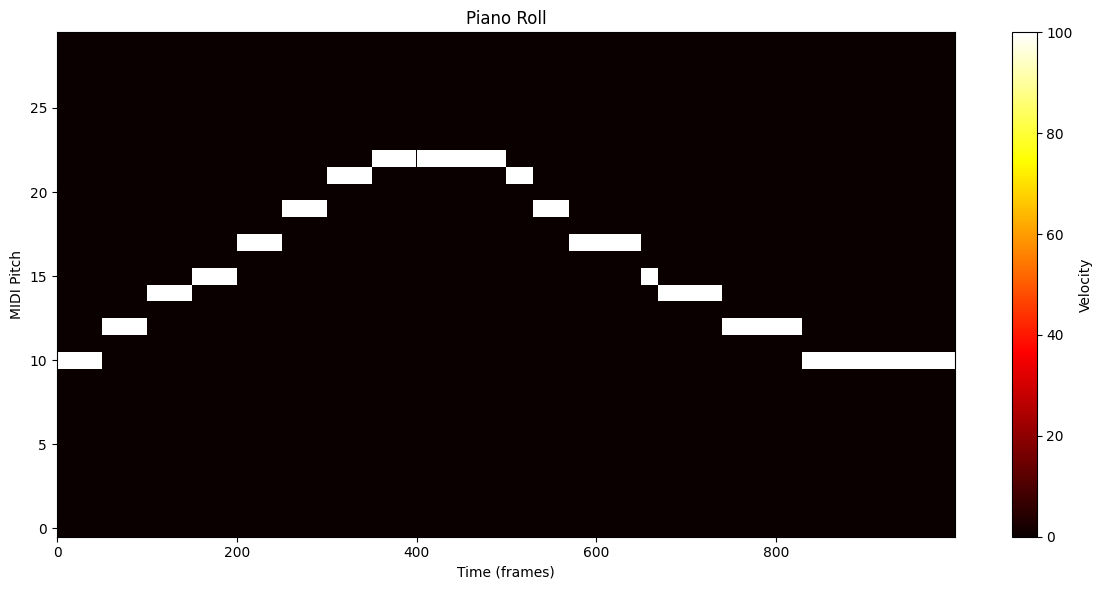

In [10]:
import numpy as np
import matplotlib.pyplot as plt

adjusted_notes = separate_continuous_notes(note_array)

# Create piano roll
time_resolution = 100  # 100 steps per second
end_time = np.max(adjusted_notes[:, 1])
n_time_steps = int(np.ceil(end_time * time_resolution))
piano_roll = np.zeros((128, n_time_steps))  # MIDI pitch range

for note in adjusted_notes:
    start, end, pitch, velocity = note
    start_idx = int(start * time_resolution)
    end_idx = int(end * time_resolution)
    piano_roll[int(pitch), start_idx:end_idx] = velocity

# Plot the piano roll
plt.figure(figsize=(12, 6))
plt.imshow(piano_roll[50:80], aspect='auto', origin='lower', cmap='hot', interpolation='nearest')
plt.xlabel('Time (frames)')
plt.ylabel('MIDI Pitch')
plt.title('Piano Roll')
plt.colorbar(label='Velocity')
plt.grid(False)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

def separate_continuous_notes(note_array, epsilon=1e-2):
    # Make a copy so we don't modify the original
    separated = []

    for i in range(len(note_array)):
        start, end, pitch, velocity = note_array[i]

        # If this is not the last note
        if i < len(note_array) - 1:
            next_start, next_end, next_pitch, next_velocity = note_array[i + 1]

            # Check if same pitch and starts immediately after current ends
            if pitch == next_pitch and abs(end - next_start) < 1e-6:
                # Shorten current note slightly to create separation
                end = next_start - epsilon

        separated.append([start, end, pitch, velocity])

    return np.array(separated)

# Example usage
adjusted_note_array = separate_continuous_notes(note_array)
print(adjusted_note_array)


[[  0.     0.5   60.   100.  ]
 [  0.5    1.    62.   100.  ]
 [  1.     1.5   64.   100.  ]
 [  1.5    2.    65.   100.  ]
 [  2.     2.5   67.   100.  ]
 [  2.5    3.    69.   100.  ]
 [  3.     3.5   71.   100.  ]
 [  3.5    3.99  72.   100.  ]
 [  4.     5.    72.   100.  ]
 [  5.     5.3   71.   100.  ]
 [  5.3    5.7   69.   100.  ]
 [  5.7    6.5   67.   100.  ]
 [  6.5    6.7   65.   100.  ]
 [  6.7    7.4   64.   100.  ]
 [  7.4    8.3   62.   100.  ]
 [  8.3   10.    60.   100.  ]]
